In [1]:
cd matlab
pwd


ans =

    '/Users/eechris/dev/EG-247-Resources/week5/matlab'



# Exponential Fourier Series

## Scope and Background Reading

This session builds on our [Revision of the to Trigonometrical Fourier Series](https://github.com/cpjobling/EG-247-Resources/blob/master/fourier_series/trig_fseries.ipynb).

Trigonometric Fourier series uses integration of a periodic signal multiplied by sines and cosines at the fundamental and harmonic frequencies. If performed by hand, this can a painstaking process. Even with the simplifications made possible by exploiting waveform symmetries, there is still a need to integrate cosine and sine terms, be aware of and able to exploit the tigonometrc identities, and the properties of *orthogonal functions* before we can arrive at the simplified solutions. This is why I concentrated on the properties and left the computation to a computer.

However, by exploiting the exponential function $e^{at}$, we can derive a method for calculating the coefficients of the harmonics that is much easier to calculate by hand and convert into an algorithm that can be executed by computer. 

The result is called the *Exponential Fourier Series* and we will develop it in this session.

The material in this presentation and notes is based on Chapter 7 (Starting at Section 7.8) of [Steven T. Karris, Signals and Systems: with Matlab Computation and Simulink Modelling, 5th Edition.](http://site.ebrary.com/lib/swansea/docDetail.action?docID=10547416) from the Required Reading List. Some clarificattion was needed and I used Chapter 4 of [Benoit Boulet, Fundamentals of Signals and Systems](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?ppg=150&docID=3135971&tm=1518703383001) from the Recommended Reading List for this.

## Agenda

*Background*

* [Trigonometric Fourier Series](https://github.com/cpjobling/EG-247-Resources/blob/master/fourier_series/trig_fseries.ipynb)

*First Hour*

* Exponents and Euler's Equation
* The Exponential Fourier series
* Symmetry in Exponential Fourier Series
* Example

*Second Hour*

* Line spectra
* Power in periodic signals
* Steady-State Response of an LTI System to a Periodic Signals

## The Exponential Function e<sup>at</sup>

* You should already be familiar with $e^{at}$ because it appears in the solution of differential equations. 
* It is also a function that appears in the definition of the Laplace and Inverse Laplace Transform.
* It pops up again and again in tables and properies of the Laplace Transform. 

## Case when a is real.

When $a$ is real the function $e^{at}$ will take one of the two forms illustrated below:

<img src="pictures/expon.png">

* When $a < 0$ the response is a decaying exponential (red line in plot)
* When $a = 0$ $e^{at} = 1$ -- essentially a model of DC
* When $a > 0$ the response is an *unbounded* increasing exponential (blue line in plot)

(Image generated with this Matlab script: [expon.m](matlab/expon.m)

### Case when a is imaginary


<img src="pictures/euler.png" title="exp(j*omega*t) = cos(omega*t) + j*sin(omega*t)">

This is the case that helps us simplify the computation of sinusoidal Fourier series.

It was [Leonhard Euler](http://en.wikipedia.org/wiki/Leonhard_Euler) who discovered the [formula](http://en.wikipedia.org/wiki/Euler%27s_formula) visualized above.


### Some important values of omega*t

These are useful when simplifying expressions that result from integrating functions that involve the imaginary exponential

Give the following:
* $e^{j\omega t}$ when $\omega t = 0$
* $e^{j\omega t}$ when $\omega t = \pi/2$
* $e^{j\omega t}$ when $\omega t = \pi$
* $e^{j\omega t}$ when $\omega t = 3\pi/2$
* $e^{j\omega t}$ when $\omega t = 2\pi$


<pre style="border: 2px solid blue">















</pre>

### Case where a is complex

We shall not say much about this case except to note that the Laplace transform equation includes such a number. The variable $s$ in the Laplace Transform 

$$\int_{0}^{\infty} f(t)e^{-st} dt$$

is a *complex exponential*.

The consequences of a complex $s$ have particular significance in the development of system stability theories and in control systems analysis and design. Look out for them in EG-243.

### Two Other Important Properties

By use of trig. identities, it is relatively straight forward to show that:

$$\cos \omega t = \frac{e^{j\omega t} + e^{-j\omega t}}{2}$$

and 

$$\sin \omega t = \frac{e^{j\omega t} - e^{-j\omega t}}{j2}$$

We can use this result to convert the *Trigonometric Fourier Series* into an *Exponential Fourier Series* which has only one integral term to solve per harmonic.

### The Exponential Fourier Series

As [as stated in the notes on the Trigonometric Fourier Series](https://github.com/cpjobling/EG-247-Resources/blob/master/fourier_series/trig_fseries.ipynb) any periodic waveform $f(t)$ can be represented as

$$\begin{gathered}
  f(t) = \frac{1}{2}{a_0} + {a_1}\cos \Omega_0 t + {a_2}\cos 2\Omega_0 t +  \cdots  \\ 
   + {b_1}\sin \Omega_0 t + {b_2}\sin 2\Omega_0 t +  \cdots  \\ 
\end{gathered} $$

If we replace the $\cos$ and $\sin$ terms with their imaginary expontial equivalents:

$$\begin{gathered}
  f(t) = \frac{1}{2}{a_0} + {a_1}\left(\frac{e^{j\Omega_0 t} + e^{-j\Omega_0 t}}{2}\right) + {a_2}\left(\frac{e^{j2\Omega_0 t} + e^{-j2\Omega_0 t}}{2}\right) +  \cdots  \\ 
   + {b_1}\left(\frac{e^{j\Omega_0 t} - e^{-j\Omega_0 t}}{j2}\right) + {b_2}\left(\frac{e^{j2\Omega_0 t} - e^{-j2\Omega_0 t}}{j2}\right) +  \cdots  \\ 
\end{gathered} $$

### Gouping terms with same exponents

$$f(t) = \cdots + \left(\frac{a_2}{2}-\frac{b_2}{j2}\right)e^{-j2\Omega_0 t} + \left(\frac{a_1}{2}-\frac{b_1}{j2}\right)e^{-j\Omega_0 t} + \frac{1}{2}{a_0} + \left(\frac{a_1}{2}+\frac{b_1}{j2}\right)e^{j\Omega_0 t} + \left(\frac{a_2}{2}+\frac{b_2}{j2}\right)e^{j2\Omega_0 t} +\cdots $$

### New coefficents

The terms in parentheses are usually denoted as

$$C_{-k} = \frac{1}{2}\left(a_k-\frac{b_k}{j}\right) = \frac{1}{2}\left(a_k+j b_k\right)$$

$$C_{k} = \frac{1}{2}\left(a_k+\frac{b_k}{j}\right) = \frac{1}{2}\left(a_k-j b_k\right)$$

$$C_0 = \frac{1}{2}a_0$$

### The Exponential Fourier Series

$$f(t) = \cdots + C_{-2}e^{-j2\Omega_0 t} + C_{-1}e^{-j\Omega_0 t} + C_0 + C_{1}e^{j\Omega_0 t} + C_{2}e^{j2\Omega_0 t} +\cdots $$

or more compactly

$$f(t) = \sum_{k=-n}^{n}C_{k}e^{-jk \Omega_0  t}$$

**Important**

The $C_k$ coefficents, except for $C_0$ are *complex* and appear in conjugate pairs so

$$C_{-k} = C_k^*$$

### Evaluation of the complex coefficients

The coefficients are obtained from the following expressions<sup>*</sup>:

$$C_k = \frac{1}{2\pi}\int_{0}^{2\pi}f(\Omega_0 t)e^{-jk(\Omega_0 t)}\,d(\Omega_0 t)$$

or

$$C_k = \frac{1}{T}\int_{0}^{T}f(t)e^{-jk\Omega_0 t}\,dt$$

These are much easier to derive and compute than the equivalent Trigonemetric Fourier Series coefficients. 


<sup>*</sup> The analysis that leads to this result is provided between pages [7-31 and 7-32 of the text book](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?ppg=243&docID=3384197&tm=1518704101461). It is not a difficult proof, but we are more interested in the result.

### Trigonometric Fourier Series from Exponential Fourier Series

By substituting $C_{-k}$ and $C_{k}$ back into the original expansion

$$C_k+C_{-k} = \frac{1}{2}\left(a_k-jb_k + a_k+jb_k\right)$$

so

$$a_k = C_k + C_{-k}$$

Similarly

$$C_k-C_{-k} = \frac{1}{2}\left(a_k-jb_k - a_k-jb_k\right)$$

so

$$b_k = j\left(C_k - C_{-k}\right)$$

Thus we can easily go back to the Trigonetric Fourier series if we want to.

## Symmetry in Exponential Fourier Series

Since the coefficients of the Exponential Fourier Series are complex numbers, we can use symmetry to determine the form of the coefficients and thereby simplify the computation of series for wave forms that have symmetry.

### Even Functions

For even functions, all coefficients $C_k$ are real.

**Proof**

Recall 

$$C_{-k} = \frac{1}{2}\left(a_k-\frac{b_k}{j}\right) = \frac{1}{2}\left(a_k+jb_k\right)$$

and

$$C_k = \frac{1}{2}\left(a_k+\frac{b_k}{j}\right) = \frac{1}{2}\left(a_k-jb_k\right)$$

From knowledge of the trig. fourier series, even functions have no sine terms so the $b_k$ coefficients are 0. Therefore both $C_{-k}$ and $C_k$ are real.

### Odd Functions

For odd functions, all coefficients $C_k$ are imaginary.

By a similar argument, all odd functions have no cosine terms so the $a_k$ coefficients are 0. Therefore both $C_{-k}$ and $C_k$ are imaginary.


### Half-wave symmetry

If there is *half-wave symmetry*, $C_k = 0$ for $n$ even.

**Proof**

From Trigonometric Fourier Series, if there is half-wave symmetry, all even harnonics are zero, thus both $a_k$ and $b_k$ are zero for $k$ even. Hence $C_{-k}$ and $C_k$ are also zero when $k$ is even.

### No symmetry

If there is no symmetry the Exponential Fourier Series of $f(t)$ is complex.

### Relation of C<sub>-k</sub> to C<sub>k</sub>

$C_{-k} = C_{k}^*$ **always**

### Example 1

Compute the Exponential Fourier Series for the square wave shown below assuming that $\omega = 1$

<img src="pictures/sqw.png"> 

### Some questions for you

* Square wave is an [**odd/even/neither**] function?
* DC component is [**zero/non-zero**]?
* Square wave [**has/does not have**] half-wave symmetry?

Hence

* $C_0 = $[**?**]
* Coefficients $C_k$ are [**real/imaginary/complex**]?
* Subscripts $k$ are [**odd only/even only/both odd and even**]?
* What is the integral that needs to be solved for $C_k$?

<pre style="border: 2px solid blue">















</pre>

### Solution

$$\frac{1}{2\pi}\left[\int_{0}^{\pi} Ae^{-jk(\Omega_0 t)}\, d(\Omega_0 t) + \int_{\pi}^{2\pi} (-A)e^{-jk(\Omega_0 t)}\, d(\Omega_0 t)\right] = \frac{1}{2\pi}\left[\left.\frac{A}{-jk}e^{-jk(\Omega_0 t)}\right|_0^\pi+\left.\frac{-A}{-jk}e^{-jk(\Omega_0 t)}\right|_\pi^{2\pi}\right]$$

$$ = \frac{1}{2\pi}\left[\frac{A}{-jk}\left(e^{-jk\pi} - 1\right)+\frac{A}{jk}\left(e^{-j2k \pi}-e^{-jk\pi}\right)\right] =
\frac{A}{2j\pi k}\left(1 - e^{-jk\pi}+ e^{-j2k \pi}-e^{-jk\pi}\right)$$

$$\frac{A}{2j\pi k}\left(e^{-j2k \pi} - 2e^{-jk\pi} -1 \right) = \frac{A}{2j\pi k}\left(e^{-jk\pi}-1\right)^2$$

For $n$ odd*, $e^{-jk\pi} = -1$. Therefore

$${C_n \atop {n=\mathrm{odd}}} = \frac{A}{2j\pi k}\left(e^{-jk\pi}-1\right)^2 = \frac{A}{2j\pi k}\left(-1-1\right)^2 = \frac{A}{2j\pi k}\left(-2\right)^2 = \frac{2A}{j\pi k}$$

<sup>*</sup> You may want to verify that $C_0 = 0$ and 

$${C_n \atop {n=\mathrm{even}}} = 0.$$


### Exponential Fourier series for the square wave with odd symmetry

From the definition of the exponential Fourier series

$$f(t) = \cdots + C_{-2}e^{-j2\Omega_0 t} + C_{-1}e^{-j\Omega_0 t} + C_{0} + C_{1}e^{j\Omega_0 t} + C_{2}e^{j2\Omega_0 t} + \cdots$$

the *exponential Fourier series for the square wave with odd symmetry* is

$$f(t) = \frac{2A}{j\pi}\left(\cdots - \frac{1}{3}e^{-j3\Omega_0 t} - e^{-j\Omega_0 t} + e^{j\Omega_0 t} + \frac{1}{3}e^{j3\Omega_0 t} + \cdots\right) = \frac{2A}{j\pi}\sum_{n = \mathrm{odd}} \frac{1}{n}e^{jk\Omega_0 t}$$

Note sign change in first two terms. This is due to the fact that $C_{-k} = C_k^*$. 

E.g. since $C_3 = 2A/j3\pi$, $C_{-3} = C_3^* = -2A/j3\pi$

### Trig. Fourier Series from Exponential Fourier Series

Since

$$f(t) = \frac{2A}{j\pi}\left(\cdots - \frac{1}{3}e^{-j3\Omega_0 t} - e^{-j\Omega_0 t} + e^{j\Omega_0 t} + \frac{1}{3}e^{j3\Omega_0 t} + \cdots\right) $$

gathering terms at each harmonic frequency gives

$$f(t) = \frac{4A}{\pi}\left(\cdots + \left(\frac{e^{j\Omega_0 t} - e^{-j\Omega_0 t}}{2j}\right)  + \frac{1}{3}\left(\frac{e^{j3\Omega_0 t} - e^{-j3\Omega_0 t}}{2j}\right)  +  \cdots\right) = \frac{4A}{\pi}\left(\sin \Omega_0 t + \frac{1}{3}\sin 3\Omega_0 t + \cdots\right) = \frac{4A}{\pi} \sum_{n=\mathrm{odd}} \frac{1}{k}\sin k\Omega_0 t$$

## Computing coefficients of Exponential Fourier Series in Matlab 

### Example 2

Verify the result of Example 1 using Matlab.

### Solution

Solution: See [efs_sqw.m](matlab/efs_sqw.m). 

### EFS_SQW
Calculates the Exponential Fourier for a Square Wave with Odd Symmetry.

In [2]:
clear all

Set up parameters

In [4]:
syms t A;

tau = 1;
T0 = 2*pi; % w = 2*pi*f -> t = 2*pi/omega
k_vec = [-5:5];

Define f(t)

**IMPORTANT**: the signal definition must cover [0 to T0]

In [5]:
xt = A*(heaviside(t)-heaviside(t-T0/2)) - A*(heaviside(t-T0/2)-heaviside(t-T0));

Compute EFS

In [10]:
[Ck, w] = FourierSeries(xt, T0, k_vec)

 
Ck =
 
[ (A*2i)/(5*pi), 0, (A*2i)/(3*pi), 0, (A*2i)/pi, 0, -(A*2i)/pi, 0, -(A*2i)/(3*pi), 0, -(A*2i)/(5*pi)]
 

w =

    -5    -4    -3    -2    -1     0     1     2     3     4     5



Plot the numerical results from Matlab calculation.

Convert symbolic to numeric result

In [8]:
Xw = subs(X,A,1);

Plot

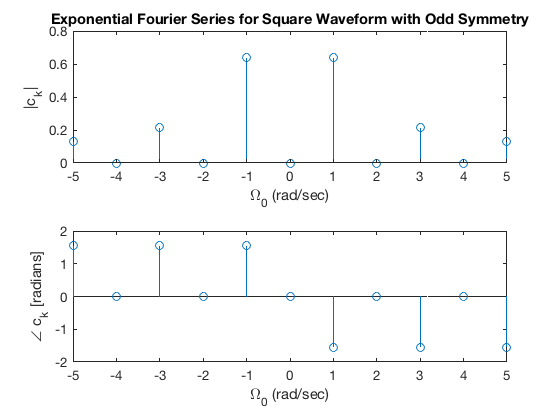

In [9]:
subplot(211)
stem(w,abs(Xw), 'o-');
title('Exponential Fourier Series for Square Waveform with Odd Symmetry')
xlabel('\Omega_0 (rad/sec)');
ylabel('|c_k|');
subplot(212)
stem(w,angle(Xw), 'o-');
xlabel('\Omega_0 (rad/sec)'); 
ylabel('\angle c_k [radians]');

## End of First Hour

*Summary*

* Exponents and Euler's Equation
* The exponential Fourier series
* Symmetry in Exponential Fourier Series
* Example

*Next Time*

* Line spectra
* Power in periodic signals
* Steady-State Response of an LTI System to a Periodic Signals

[Read notes](http://nbviewer.jupyter.org/github/cpjobling/EG-247-Resources/blob/master/week5/exp_fs2.ipynb)

## Answers to in-class problems

### Some important values of omega*t - Solution

* When $\omega t = 0$: $e^{j\omega t} = e^{j0} = 1$
* When $\omega t = \pi/2$: $e^{j\omega t} = e^{j\pi/2} = j$
* When $\omega t = \pi$: $e^{j\omega t} = e^{j\pi} = -1$
* When $\omega t = 3\pi/2$: $e^{j\omega t} = e^{j3\pi/2} = -j$
* When $\omega t = 2\pi$: $e^{j\omega t} = e^{j2\pi} e^{j0}= 1$

It is also worth being aware that $n\omega t$, when $n$ is an integer, produces rotations that often map back to the simpler cases given above. For example see $e^{j2\pi}$ above.


### Some answers for you

* Square wave is an **odd** function!
* DC component is **zero**!
* Square wave **has** half-wave symmetry!

Hence

* $C_0 = 0$
* Coefficients $C_k$ are **imaginary**!
* Subscripts $k$ are **odd only**!
* What is the integral that needs to be solved for $C_k$?

$$C_k = \frac{1}{2\pi}\int_{0}^{2\pi} f(\Omega_0 t)e^{-jk(\Omega_0 t)}\, d(\Omega_0 t) = \frac{1}{2\pi}\left[\int_{0}^{\pi} Ae^{-jk(\Omega_0 t)}\, d(\Omega_0 t) + \int_{\pi}^{2\pi} (-A)e^{-jk(\Omega_0 t)}\, d(\Omega_0 t)\right]$$